In [1]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import scipy.stats as stats


In [2]:
df = pd.read_csv('my_dataframe.csv')
df = df.drop(columns=['Unnamed: 0'])
df

,OPEFLAG,CONTROL,TUITFTE,INEXPFTE,AVGFACSAL,OPENADMP,ADM_RATE,SAT_AVG,ACTCMMID,COSTT4_A,...,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,PPTUG_EF2,NPT4_PUB,NPT4_PRIV,NPT41_PUB,NUM4_PUB,NUM4_PRIV,PFTFAC
0,1,1,7413.0,5384.0,7101.0,2.0,0.8986,957.0,18.0,22489.0,...,0.105148,0.062147,0.040804,NaN,14444.0,NaN,13893.0,592.0,NaN,0.7411
1,1,1,13177.0,16454.0,10717.0,2.0,0.9211,1220.0,25.0,24347.0,...,0.142351,0.114589,0.135644,NaN,17005.0,NaN,14550.0,1229.0,NaN,0.7766
2,1,2,14273.0,4206.0,4292.0,1.0,NaN,NaN,NaN,17680.0,...,0.064189,NaN,NaN,NaN,NaN,15322.0,NaN,NaN,5.0,1.0000
3,1,1,8677.0,9242.0,9442.0,2.0,0.8087,1314.0,28.0,23441.0,...,0.146923,0.150691,0.190038,NaN,20909.0,NaN,17561.0,585.0,NaN,0.6544
4,1,1,10160.0,8527.0,7754.0,2.0,0.9774,972.0,18.0,21476.0,...,0.112620,0.052716,0.041534,NaN,13043.0,NaN,11344.0,523.0,NaN,0.5826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,1,2,6477.0,6188.0,2667.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2054,1,1,12317.0,153080.0,18393.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9260
2055,1,3,24145.0,23749.0,6620.0,2.0,0.2500,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2500
2056,1,2,9970.0,4515.0,5794.0,1.0,NaN,NaN,NaN,19707.0,...,NaN,NaN,NaN,NaN,NaN,14368.0,NaN,NaN,34.0,1.0000


In [3]:
df.corr()['C150_4_POOLED'].sort_values()

INC_PCT_LO         -0.652497
FTFTPCTPELL        -0.593015
INC_PCT_M1         -0.482295
ADM_RATE           -0.355987
POVERTY_RATE       -0.348215
PCT_BLACK          -0.320807
CONTROL            -0.117852
FTFTPCTFLOAN       -0.083558
OPEFLAG             0.002234
NPT41_PUB           0.033531
INC_PCT_M2          0.172434
UGDS                0.193270
RET_PT4             0.219215
PFTFAC              0.237818
RET_PT4_POOLED      0.316644
NUM4_PRIV           0.319880
TUITFTE             0.338561
OPENADMP            0.381871
DEBT_MDN            0.409814
NPT4_PUB            0.421264
INC_PCT_H1          0.469297
NUM4_PUB            0.470871
LN_MEDIAN_HH_INC    0.476839
NPT4_PRIV           0.478567
INEXPFTE            0.488471
MEDIAN_HH_INC       0.550768
TUITIONFEE_IN       0.572610
AVGFACSAL           0.593928
COSTT4_A            0.608755
RET_FT4             0.656363
TUITIONFEE_OUT      0.697612
RET_FT4_POOLED      0.732853
INC_PCT_H2          0.765626
SAT_AVG             0.825884
ACTCMMID      

In [4]:
df1 = df[['C150_4_POOLED','INC_PCT_LO','FTFTPCTPELL','INEXPFTE','MEDIAN_HH_INC','TUITIONFEE_IN','AVGFACSAL','COSTT4_A','TUITIONFEE_OUT','RET_FT4_POOLED','INC_PCT_H2','SAT_AVG','ACTCMMID',]]

In [5]:
df1.corr()['C150_4_POOLED']

C150_4_POOLED     1.000000
INC_PCT_LO       -0.652497
FTFTPCTPELL      -0.593015
INEXPFTE          0.488471
MEDIAN_HH_INC     0.550768
TUITIONFEE_IN     0.572610
AVGFACSAL         0.593928
COSTT4_A          0.608755
TUITIONFEE_OUT    0.697612
RET_FT4_POOLED    0.732853
INC_PCT_H2        0.765626
SAT_AVG           0.825884
ACTCMMID          0.834112
Name: C150_4_POOLED, dtype: float64

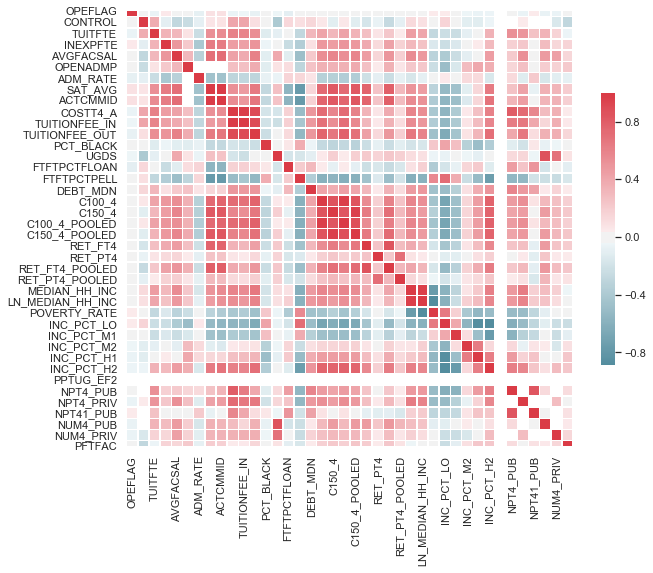

In [6]:
# heatmap 1
sns.set(style="white")
# Compute the correlation matrix
corr = df.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

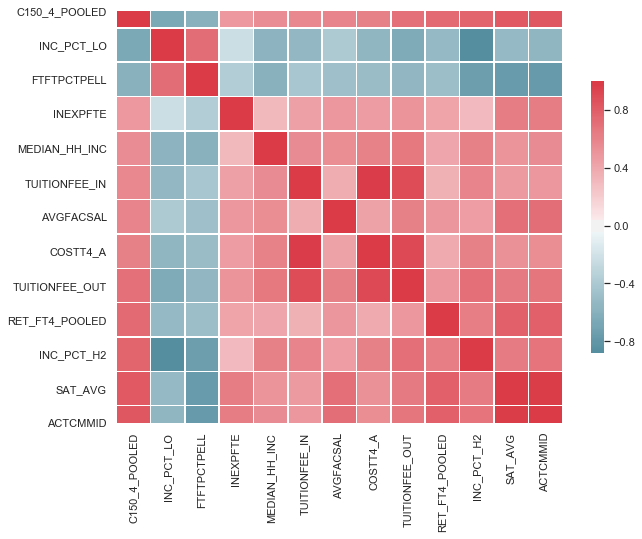

In [7]:
# heatmap 2
sns.set(style="white")
# Compute the correlation matrix
corr = df1.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

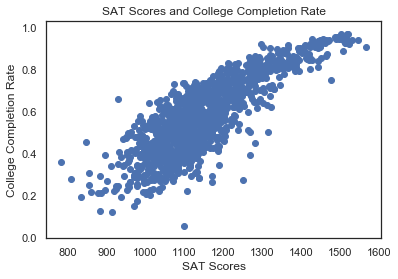

In [8]:
# scatterplots of testing scores vs college completion rate
fig, ax = plt.subplots()
ax.set_title('SAT Scores and College Completion Rate')
ax.set_xlabel('SAT Scores')
ax.set_ylabel('College Completion Rate')
x = df['SAT_AVG']
y = df['C150_4_POOLED']
ax.scatter(x, y)
plt.show()

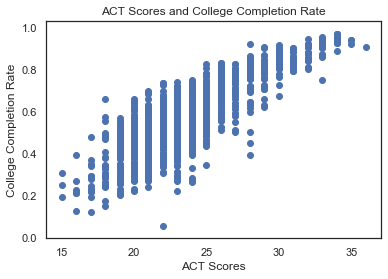

In [9]:
# scatterplots of testing scores vs college completion rate
fig, ax = plt.subplots()
ax.set_title('ACT Scores and College Completion Rate')
ax.set_xlabel('ACT Scores')
ax.set_ylabel('College Completion Rate')
x = df['ACTCMMID']
y = df['C150_4_POOLED']
ax.scatter(x, y)
plt.show()

In [ ]:
# ACT low, mid & high 
act_low = df1[df1['ACTCMMID'] < 18.5]
act_mid = df1[df1['ACTCMMID'] <= 22.5]
act_high = df1[df1['ACTCMMID'] > 22.5]

# SAT low, mid & high 
sat_low = df1[df1['SAT_AVG'] < 900]
sat_mid = df1[df1['SAT_AVG'] <= 1200]
sat_high = df1[df1['SAT_AVG'] > 1200]

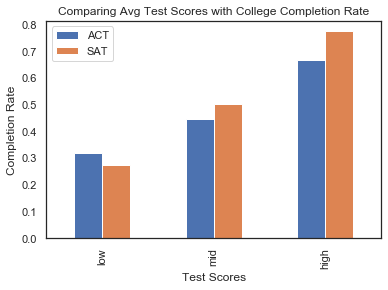

In [64]:
low_values = [0.32095, 0.27283]
mid_values = [0.44672, 0.50393]
high_values = [0.66767, 0.77459]
labels = ['ACT','SAT']

df_low = pd.DataFrame(low_values,index=labels)
df_mid = pd.DataFrame(mid_values,index=labels)
df_high = pd.DataFrame(high_values,index=labels)

df_bar = pd.concat([df_low.T, df_mid.T, df_high.T], axis=0, ignore_index=False)
df_bar.reset_index(inplace = True)
labels = ['low','mid','high']
df_bar['Test Scores'] = labels

ax = df_bar.plot(x='Test Scores', y=['ACT','SAT'], kind="bar");
ax.set_title('Comparing Avg Test Scores with College Completion Rate')
ax.set_ylabel('Completion Rate')
plt.show()